In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import os

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
citibike = mglearn.datasets.load_citibike()

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectPercentile

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures


# カテゴリ変数
実際のデータベースには，連続値だけでなくカテゴリ変数がある．  
たとえば，年齢は連続値だが，性別はカテゴリ変数である．  
ロジスティック回帰などを考えると，連続値と同じようにカテゴリ変数を扱うのは変である．  

そこで，カテゴリ変数を表現する方法として圧倒的によく用いられる手法がone-hot-encodingである．  
one-hot-encodingは性別として2つの種類があるとすると，2つの特徴量を追加し，1 or 0で表現する．  
one-hot-encodingのやり方は以下

In [6]:
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [8]:
# 性別がどのような表記でされているかを確認
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
# カテゴリ変数をone-hot表現に変更

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [12]:
'''
つぎは，カテゴリ変数が文字ではなく数字で表現されている場合どうするか？ 
その場合は数字を文字列にする
'''


demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### ビニング，離散化
データをどう表現するかは，利用する機械学習のモデルに依存する．  
線形モデルは1つしか特徴量が無い場合は1本の線になる．  
これをよりよくするには，ビニング(離散化)という手法がある．  

ビニングは数値データをビンでわける．  
例えば，0から1，1から2，2から3・・・といった具合にわけ，その特徴量がどこに属しているかでone-hot表現にする．  
そうすることで，線形モデルでより柔軟に表現ができる．  

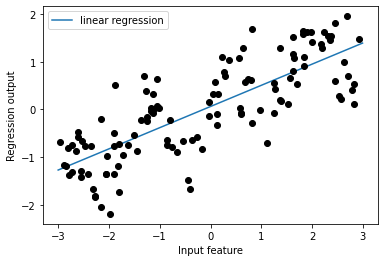

In [2]:
# ビニングする前のデータ
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [8]:
# 10のビンを作るようにビニングする．
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input feature')

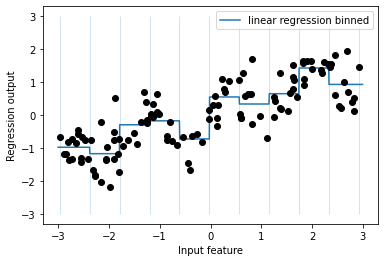

In [11]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

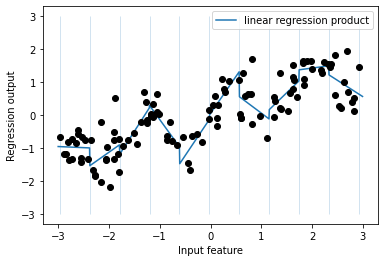

In [13]:
# 傾きがないので，傾きを追加する

X_product = np.hstack([X_binned, X * X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 特徴量の多項式
ビニングは連続値特徴量を拡張した．  
多項式も特徴量を拡張する方法の1つ  
特徴量を2乗，3乗...していく．

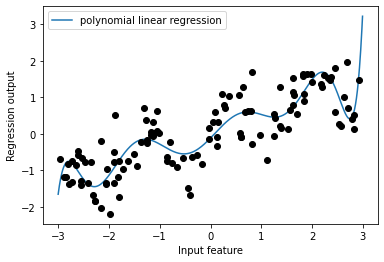

In [17]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

これは，SVMだと明示的にこのような変換をしなくても同様のふるまいをする．  
また，多項式を使用すると，Ridgeなどの性能は向上するが，ランダムフォレストは性能が低下することがある．

### 単変量非線形変換
特徴量の分布がガウス分布の場合が，ほとんどの学習器で性能が高くなる．  
ガウス分布にするために，非線形の変換をすることで，性能が高くなることがある．  
変換する方法は，logやexpやsinなどがある．  

Text(0.5, 0, 'Value')

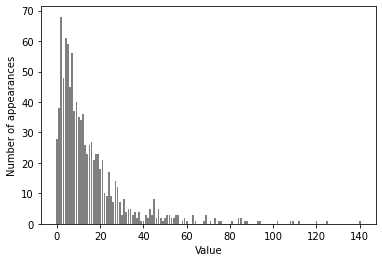

In [4]:
# ポワソン分布のデータ．カウントデータとして基本的なもの

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [8]:
# ポワソン分布のままだと精度が低い

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Text(0.5, 0, 'Value')

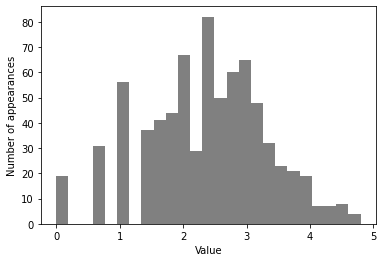

In [9]:
# logをとることで，ガウス分布に近くなる

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [11]:
# logをとることで精度が高くなる．ただし，本当はポワソン回帰を使ったほうがいいらしい．

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## 自動特徴量選択
良い特徴量を自動で選択する方法  
- 単変量統計
- モデルベース選択
- 反復選択

これらの方法は教師あり手法

### 単変量統計
特徴量とターゲットとの間に統計的に顕著な関係があるかどうかを計算する．  
特長量とターゲットにANOVAをして，関係があれば残す．  
ただ，他の特徴量と組み合わさって意味をもつ特徴量は捨てられる．  

In [4]:
# cancerデータにノイズ特徴量を付与する．

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

In [18]:
# 特徴量を減らす

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


### モデルベース特徴量選択
教師あり学習モデルを用いて個々の特徴量の重要性を判断する．  
ここで使うモデルは，最終的に使うモデルと異なっていてもよい．  

In [6]:
# RandomForestを用いて特徴量の重要性を判断する．

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


# 専門的にどのように特徴量エンジニアリングするか
ある自転車ポートでレンタルされた自転車の数から，ある日程でレンタルされるであろう自転車の数を予測する．  
特徴量は日時のみである．  


Text(0, 0.5, 'Rentals')

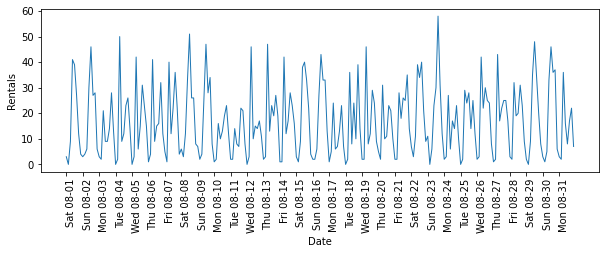

In [9]:
# ある自転車ポートで，レンタルされた自転車の数

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [11]:
# 日時を格納する

y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [12]:
 # 最初の184のデータを学習データ，他をテストデータとする．

n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


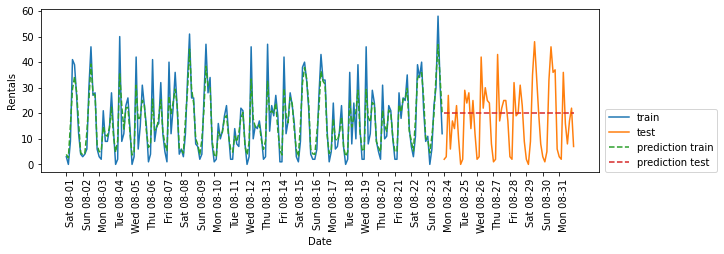

In [17]:
"""
生データの解析は，Random Forestではうまくいかない．
なぜなら特徴値が未来の値で，訓練データの範囲外だから．
Random Forestは特徴量も正解データも範囲内にある必要がある．
"""
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


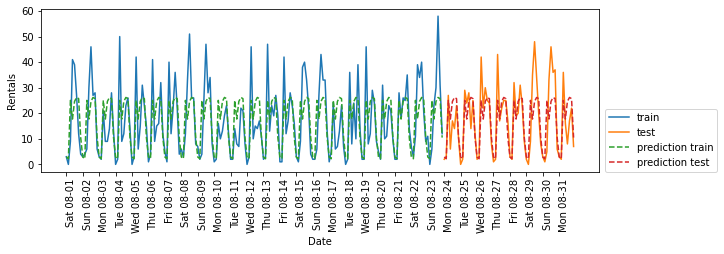

In [18]:
# 時刻を特徴量とする

X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


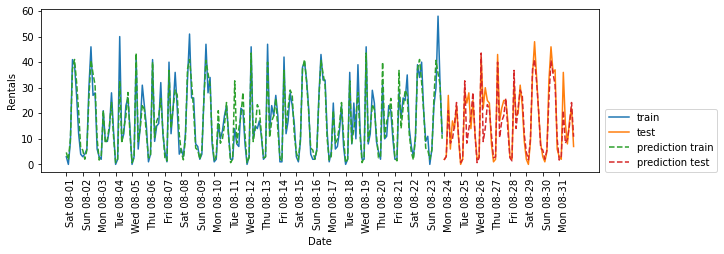

In [19]:
# 曜日も特徴量とする

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13
Test-set R^2: 0.62
Test-set R^2: 0.85


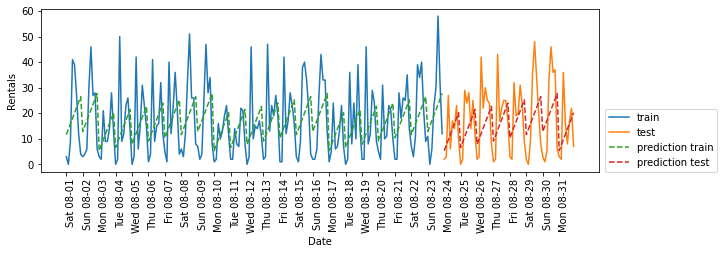

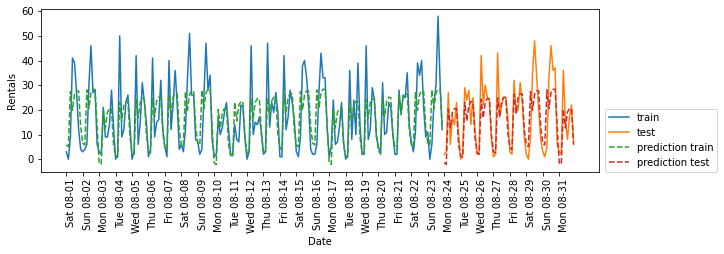

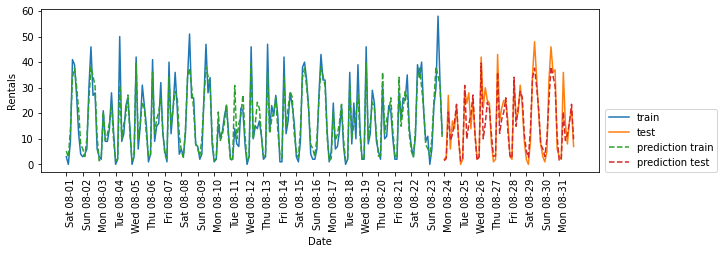

In [23]:
"""
線形モデルでもやってみる．
時間と曜日の特徴量ではうまくいかない．
これは，連続値として認識されているからなので，OneHot表現にする．
そして，曜日と時刻の交互作用特徴量とすれば，Random Forestくらいの精度になる．

"""
eval_on_features(X_hour_week, y, LinearRegression())

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


Text(0, 0.5, 'Feature magnitude')

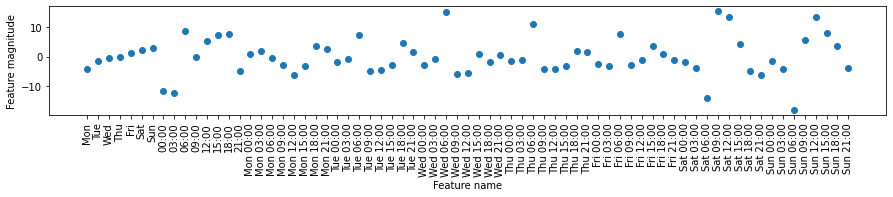

In [24]:
# 線形モデルの長所は何を学習したかが明確に係数として示されるのが利点

hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")